# iris 데이터를 통한 기본적인 군집분석 원리와 분석과정 연습

### 군집분석이란?
- unsupervised learning으로, 데이터 간의 유사도를 정의하고 그 유사도에 가까운 것부터 순서대로 합쳐가는 방법이며, 유사도의 정의에는 거리나 상관계수 등 여러가지가 있다.

### 데이터 불러오기

In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [97]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
# 컬럼명 변경
column_name_list = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# iris_df.columns = column_name_list

columns_replace_dict = {k:v for k, v in zip(iris.feature_names, column_name_list)}

In [99]:
iris_df.rename(columns_replace_dict, axis="columns", inplace=True)
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [100]:
# target 컬럼 추가
iris_df['target'] = iris.target
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [101]:
iris_df.target.unique()

array([0, 1, 2])

In [102]:
### 결측값 확인
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [103]:
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [104]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [105]:
import plotly.express as px
fig=px.scatter(iris_df, x='sepal_length', y='sepal_width')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

In [106]:
fig=px.scatter(iris_df, x='sepal_length', y='sepal_width', color='target')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

In [107]:
# 다른 컬럼으로 만들기
fig=px.scatter(iris_df, x='petal_length', y='petal_width', color='target')
fig.update_layout(width = 600, height=500) # 사이즈 조정
fig.show()

### K-Means 알고리즘

In [108]:
from sklearn.cluster import KMeans

In [109]:
X = iris_df.iloc[:,:-1]
Y = iris_df.iloc[:,-1]

train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)
print(len(train_x), len(test_x))

120 30


In [110]:
# 5개의 그룹으로 clustering
km = KMeans(n_clusters=5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [111]:
km.fit(train_x)
clusters_array = km.labels_

In [112]:
# 실제 iris 데이터의 그룹과 훈련된 cluster의 결과를 비교
compare_clusters = dict(zip(clusters_array, train_y))
compare_clusters

{0: 0, 1: 1, 2: 2, 3: 2, 4: 1}

In [113]:
# 훈련된 label 기준으로 시각화
fig = px.scatter(x=train_x['petal_width'], y=train_x['petal_length'], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

In [114]:
# 훈련된 label 기준으로 시각화
fig = px.scatter(x=train_x['sepal_width'], y=train_x['sepal_length'], color=clusters_array)
fig.update_layout(width=600, height=500)
fig.show()

- 각 클러스터의 중심점에서 데이터 간의 거리를 합한 수치

In [115]:
# Sum of squared distances of samples to their closest cluster center. 
km.inertia_ 

34.29899827770796

### 최적의 k 찾기 (Elbow method)
- unsupervised 방법으로 실제 k의 수는 정해져있지 않기에 최적의 k를 찾는 것부터 시작.

  > Elbow method란?
  
  > Total intra-cluster variation(or total within-cluster sum of suqare(=WSS))가 최소가 되는 k를 찾는 방법.

In [116]:
# k와 sum of squared distsances from each point의 합(distortion)을 비교

distortions = []
k_range = range(1, 11)
for i in k_range:
  print(i)
  km = KMeans(n_clusters=i)
  km.fit(train_x)
  distortions.append(km.inertia_)

print(distortions)

1
2
3
4
5
6
7
8
9
10
[554.4363333333333, 118.49598086124402, 60.85238571428572, 41.4849084177345, 34.27097078983108, 28.90147095959596, 25.31324494949495, 22.235566027926325, 20.84514285714286, 19.46862770562771]


In [117]:
# x축이 k의 수, y축이 distortions인 line plot 그리기
fig = px.line(x=k_range, y=distortions, labels={"x":"k", "y":"distortions"})
fig.update_layout(width=800, height=600)
fig.show()

- model 훈련과 함께 그래프를 그려주고 훈련 시간까지 확인해주는 모듈인 KElbowVisualizer 사용

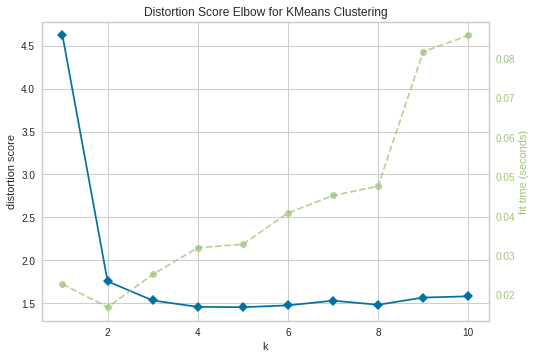

In [118]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 11))
visualizer.fit(train_x)
visualizer.poof()

In [119]:
!pip install kneed

In [120]:
# 그래프 확인 없이 최적 k값을 자동으로 찾아줌
from kneed import KneeLocator

kneedle = KneeLocator(x=k_range, y=distortions, curve='convex', direction='decreasing')
kneedle.elbow

2

In [121]:
kneedle = KneeLocator(x=k_range, y=distortions, curve='convex', direction='decreasing')
kneedle.elbow_y

118.49598086124402

- k가 3일 때, y가 59.499인 것을 확인할 수 있음.

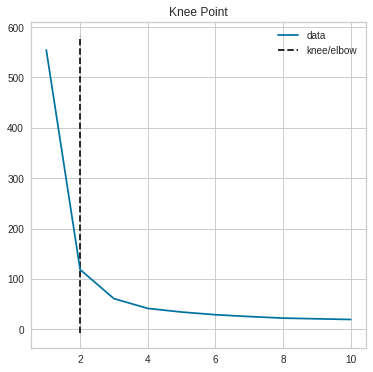

In [122]:
kneedle.plot_knee()

### Silhouette method
> Cluster 내의 거리와 clusterrksdml 거리를 사용한 계수로 Silhouette coefficient(SC)값이 최대가 되는 k를 찾는 방법.

> SC해석이란?

> 각 cluster 사이의 거리가 멀고 cluster 내 데이터의 거리가 작을 수록 군집 분석의 성능이 좋음. 

>Silhouette 값은 -1에서 1까지 가능하며, 0일 경우에는 cluster간의 변별력이 없다는 의미. -1에 가까울 수록 clustering의 결과가 좋지 않음을 의미.

In [123]:
# silhouette_score는 array 형태를 읽을 수 있으며, 군집 간의 거리 계산을 필요로 하기에 최소 2개 이상의 label/cluster가 있어야 함.
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)
for i in k_range:
  print(i)
  km = KMeans(n_clusters=i)
  km.fit(train_x)
  label=km.predict(train_x)
  sc_value=silhouette_score(np.array(train_x), label, metric='euclidean', sample_size=None, random_state=None)
  silhouette_scores.append(sc_value)

print(silhouette_scores)

2
3
4
5
6
7
8
9
10
[0.6896319250535407, 0.5653218681417272, 0.5259744643638331, 0.4979413154459669, 0.36094564620993036, 0.35223099616614856, 0.3329389247338361, 0.3421132995244538, 0.33388781974298165]


In [124]:
fig = px.line(x=k_range, y=silhouette_scores, labels={"x":"k","y":"silhouette scores"})
fig.update_layout(width=800, height=500)
fig.show()

2


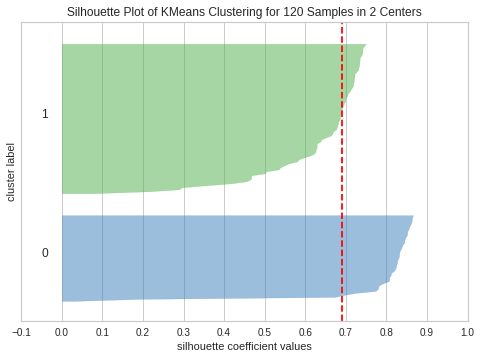

3


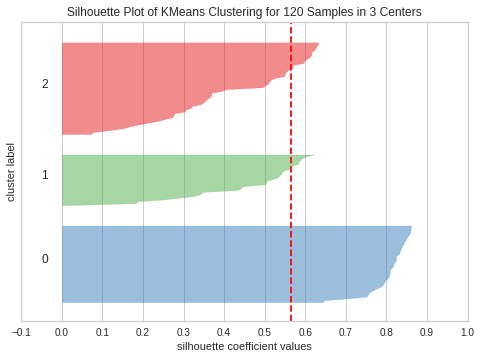

4


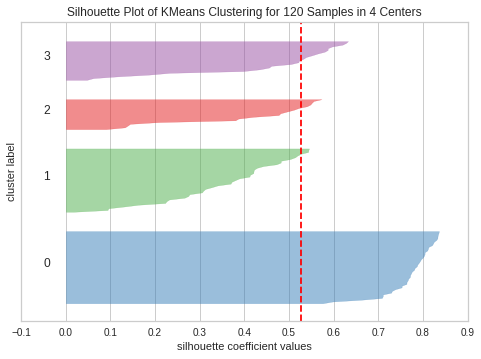

5


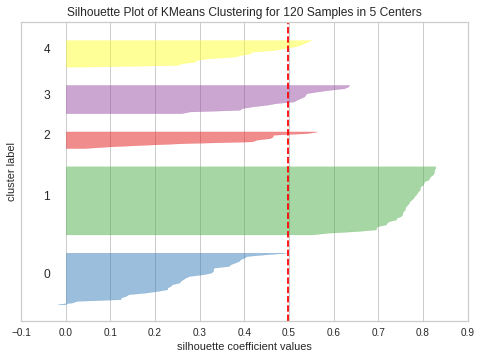

6


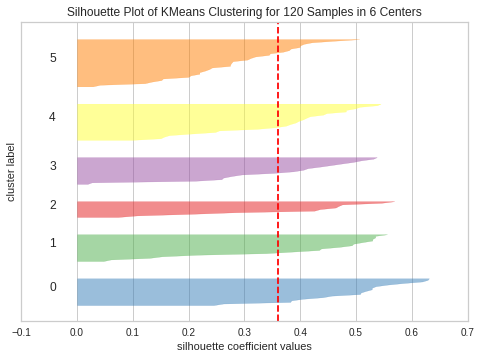

7


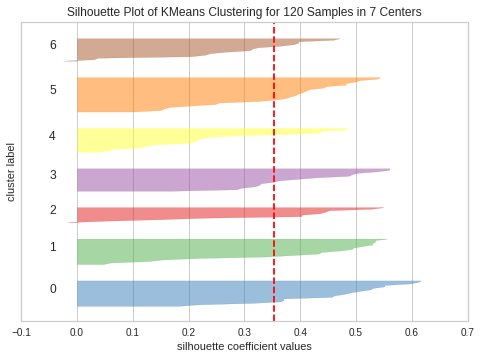

8


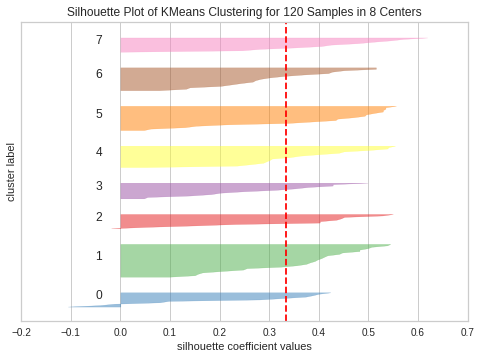

9


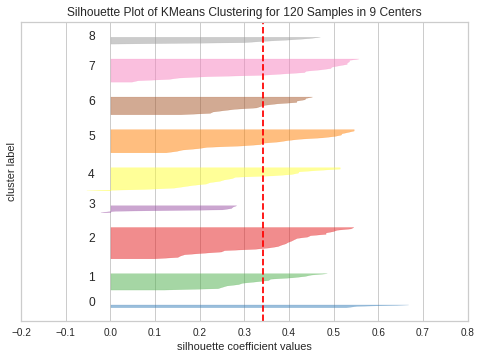

10


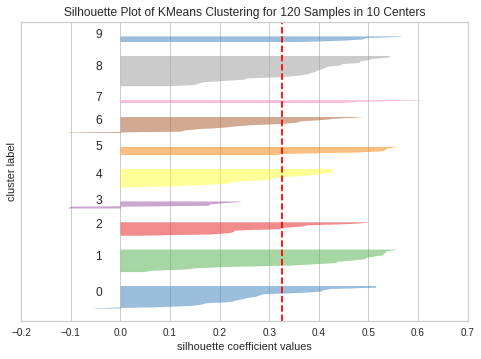

In [125]:
from yellowbrick.cluster import SilhouetteVisualizer
k_range = range(2,11)
for i in k_range:
  print(i)
  km=KMeans(n_clusters=i)
  visualizer = SilhouetteVisualizer(km)
  visualizer.fit(train_x)
  visualizer.poof()

In [126]:
# 최적의 k를 할당하고 k-means model 훈련
k = 3
km = KMeans(n_clusters=k).fit(train_x)
train_cluster = km.labels_
train_cluster

array([1, 0, 0, 0, 2, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 0, 1, 2,
       2, 1, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1, 1, 0, 0, 0, 1, 2,
       2, 0, 2, 2, 0, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 0, 2, 0, 2], dtype=int32)

In [127]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [128]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [129]:
# prediction
test_cluster = km.fit_predict(test_x)
test_cluster

array([2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2,
       2, 0, 2, 2, 0, 2, 1, 1], dtype=int32)

In [130]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=test_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=test_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [131]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "k-means"))
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=test_y)),
               row=1, col=1
)
fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=test_cluster)),
               row=1, col=2
)
fig.update_layout(width=800, height=600)
fig.show()

In [132]:
# 수치화 평가 - accuracy score
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_y, train_cluster)
print(train_acc)

0.4583333333333333


In [133]:
test_acc = accuracy_score(test_y, test_cluster)
print(test_acc)

0.26666666666666666


In [134]:
# 실제 cluster명과 매칭해주는 함수 만들기
import scipy

def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
  matched_cluster={}
  actual_case = list(set(actual_labels))
  for i in cluster_case:
    idx = cluster_labels == i
    new_label = scipy.stats.mode(actual_labels[idx])[0][0]
    actual_case.remove(new_label)
    matched_cluster[i] = new_label
    print(f"훈련된 label명 : {i} >> 가장 빈번한 실제 label명 : {new_label}")
  return matched_cluster

In [135]:
km_train_case = list(set(train_cluster))
print(km_train_case)

[0, 1, 2]


In [136]:
train_param_dict = find_matching_cluster(km_train_case, train_y,train_cluster)
train_param_dict

훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 0
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 2
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 1


{0: 0, 1: 2, 2: 1}

In [137]:
km_test_case = list(set(test_cluster))
print(km_test_case)

[0, 1, 2]


In [138]:
test_param_dict = find_matching_cluster(km_test_case, test_y,test_cluster)
test_param_dict

훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 1
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 2


{0: 1, 1: 0, 2: 2}

In [139]:
train_new_labels = [train_param_dict[label] for label in train_cluster]
test_new_labels = [test_param_dict[label] for label in test_cluster]

In [140]:
train_acc = accuracy_score(train_y, train_new_labels)
test_acc = accuracy_score(test_y, test_new_labels)

print(train_acc, test_acc)

0.8916666666666667 0.9


### Clustering : Agglomerative 알고리즘(계층군집)
- 데이터 자체의 분포와 어떻게 grouping을 하고자 하는지에 따라 다른 알고리즘이 사용될 수 있음.

### Kmeans VS Agglomerative 비교

[k-means 최적의 환경]
- 원형 혹은 구 형태의 분포
- 동일한 데이터 분포
- 동일한 밀집도
- 군집의 센터에 주로 밀집된 분포
- Noise와 outlier가 적은 분포

[k-means의 민감성]
- Noise와 outlier에 민감함
- 처음 시작하는 점에 따라 결과에 영향을 줌.
- k값을 직접 설정해야하는 어려움이 있음.

In [141]:
# Agglomerative 모듈 import
from sklearn.cluster import AgglomerativeClustering

In [142]:
agg1 = AgglomerativeClustering(n_clusters=3, linkage="ward", affinity='euclidean').fit(train_x)
agg1

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [143]:
# 훈련된 label 저장
agg1_labels = agg1.labels_

# 원래의 label과 Agglomerative 알고리즘 결과를 시각화로 비교
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "agg1_cluster"))

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_y)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=agg1_labels)),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [144]:
# 훈련된 label 저장
agg1_labels = agg1.labels_

# 원래의 label과 Agglomerative 알고리즘 결과를 시각화로 비교
fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "agg1_cluster"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_y)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=agg1_labels)),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [145]:
# clustering 결과 수치적 평가
agg1_case = list(set(agg1_labels))
print(agg1_case)
# 매칭되는 dictionary 생성
agg1_perm_dict = find_matching_cluster(agg1_case, train_y, agg1_labels)
print(agg1_perm_dict)
# 생성한 dict 변수를 사용하여 훈련된 결과 라벨 변경
agg1_new_labels = [agg1_perm_dict[label] for label in agg1_labels]
print(agg1_new_labels)

[0, 1, 2]
훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 2
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 1
{0: 2, 1: 0, 2: 1}
[2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2, 1, 1, 2, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 2, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2]


In [146]:
# 새로 할당된 cluster 명으로 다시 acc 계산하고 k-means 결과값과 비교
# acc는 k-means의 시작점과 train/test 분류의 영향으로 매번 상이하게 나올 수 있음.
agg1_acc = accuracy_score(train_y, agg1_new_labels)
agg1_acc

0.875

In [147]:
# dendrogram 그리기
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [148]:
# linkage matrix 구조 파악하기
sample_arr = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
sample_arr

[[2], [8], [0], [4], [1], [9], [9], [0]]

In [149]:
sample_linkage = linkage(sample_arr)
print(sample_linkage)

[[ 2.  7.  0.  2.]
 [ 5.  6.  0.  2.]
 [ 0.  4.  1.  2.]
 [ 8. 10.  1.  4.]
 [ 1.  9.  1.  3.]
 [ 3. 11.  2.  5.]
 [12. 13.  4.  8.]]


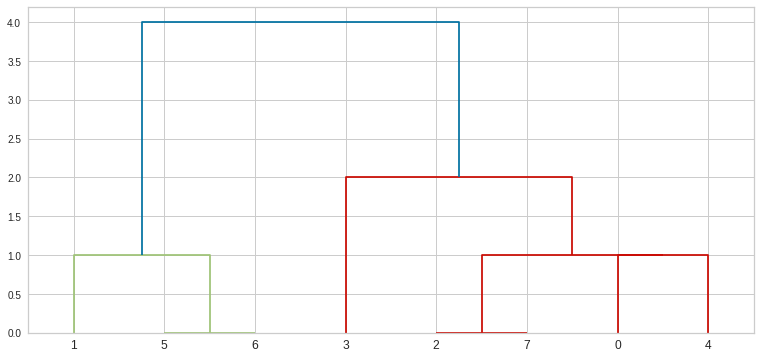

In [150]:
fig = plt.figure(figsize=(13, 6))
dn = dendrogram(sample_linkage)
plt.show()

In [151]:
# linkage_matrix 생성하는 함수 만들기

def create_linkage(model):
  # 각 노드 총 point수 계산하기
  counts = np.zeros(model.children_.shape[0]) #children 길이만큼 0을 채운 array
  n_samples = len(model.labels_) # 각 point의 cluster label.
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1 #leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
  return linkage_matrix

In [152]:
# Dendrogram 그리기 위해선 distance_threshold와 n_cluster parameter 조정 필요.
agg1_dend = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(train_x)
agg1_dend

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=0, linkage='ward',
                        memory=None, n_clusters=None)

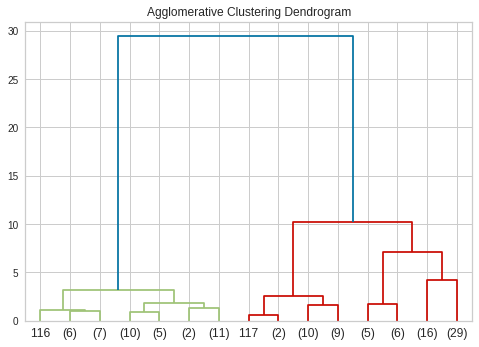

In [153]:
# x축 - 실제 point(혹은 각 node에 포함되는 point 수)
plt.title("Agglomerative Clustering Dendrogram")
linkage_matrix = create_linkage(agg1_dend)
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.show()

In [154]:
# dendrogram에서 정한 cluster 수로 모델 훈련시키기
agg1 = AgglomerativeClustering(n_clusters=4, linkage="ward", affinity="euclidean").fit(train_x)
agg1

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

In [155]:
agg1_labels = agg1.labels_

fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "agg1_cluster"))

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=train_y)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["sepal_width"],
               y=train_x["sepal_length"],
               mode="markers",
               marker=dict(color=agg1_labels)),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

In [156]:
agg1_labels = agg1.labels_

fig = make_subplots(rows=1, cols=2, subplot_titles=("actual", "agg1_cluster"))

fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=train_y)),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_x["petal_width"],
               y=train_x["petal_length"],
               mode="markers",
               marker=dict(color=agg1_labels)),
    row=1, col=2
)

fig.update_layout(height=600, width=800)
fig.show()

### 그럼 Agglomerative는 언제 사용해야할까?

[Hierarchical clustering의 장단점]
- cluster 수(k)를 정하지 않아도 사용 가능.
- random point에서 시작하지 않으므로, 동일한 결과가 나옴.
- dendrogram을 통해 전체적인 군집을 확인할 수 있음 (nested clusters).

- 대용량 데이터에 비효율적임 (계산이 많음)

-> 샘플 데이터로 가볍게 군집분포를 확인하거나 nested clusters를 확인하기에 유용함.

-> HDBSCAN의 기초지식

### DBSCAN 알고리즘
[장점]
- K-means와 달리 최초 k(군집수)를 직접 할당하지 않음.
- Density(밀도)에 따라서 군집을 나누기 때문에, 기하학적인 모양을 갖는 분포도 적용 가능.
- Outlier 구분이 가능함.

In [157]:
# DBSCAN - 비구형 데이터 생성하기
from sklearn.datasets import make_moons # 랜덤한 분포 생성

moon_data, moon_labels = make_moons(n_samples=400, noise=0.1, random_state=42)
moon_data[:5]

array([[-0.04405185,  0.43607778],
       [ 0.69223045, -0.40111946],
       [ 0.8281978 ,  0.54152189],
       [ 0.17881243,  0.26886231],
       [ 0.0917154 ,  0.94611799]])

In [158]:
moon_labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,

In [159]:
moon_data_df = pd.DataFrame(moon_data, columns=["x","y"])
moon_data_df["label"] = moon_labels
moon_data_df.head()

,x,y,label
0,-0.044052,0.436078,1
1,0.692230,-0.401119,1
2,0.828198,0.541522,0
3,0.178812,0.268862,1
4,0.091715,0.946118,0


In [160]:
# noise = 0.1
fig = px.scatter(moon_data_df, x="x", y="y", color="label")
fig.update_layout(width=600, height=500)
fig.show()

In [161]:
# noise = 0.9
fig = px.scatter(moon_data_df, x="x", y="y", color="label")
fig.update_layout(width=600, height=500)
fig.show()

In [162]:
from sklearn.cluster import DBSCAN

In [163]:
# DBSCAN의 파라미터인 eps(radius of neighborhood)와 min_samples(minimum number of data points) 설정
dbscan = DBSCAN(eps=0.2, min_samples=6)

In [164]:
dbscan.fit(moon_data)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=6, n_jobs=None, p=None)

In [165]:
dbscan_label = dbscan.labels_
dbscan_label[:10]

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 1])

In [166]:
set(dbscan_label)

{-1, 0, 1}

In [167]:
moon_data_df["dbscan_label"] = dbscan_label

fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
fig.update_layout(width=600, height=500)
fig.show()

In [168]:
# eps 파라미터가 각각 다를 때 cluster 차이 비교
for eps in [0.1, 0.2, 0.5]:
  dbscan = DBSCAN(eps=eps, min_samples=6).fit(moon_data)
  dbscan_label = dbscan.labels_
  print(f"eps:{eps} ->> label 수 : {len(set(dbscan_label))}")
  moon_data_df["dbscan_label"] = dbscan_label

  fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
  fig.update_layout(width=600, height=500)
  fig.show()

eps:0.1 ->> label 수 : 19


eps:0.2 ->> label 수 : 3


eps:0.5 ->> label 수 : 1


In [169]:
# min_samples 파라미터가 각각 다를 때 cluster 차이 비교
for min_samples in [2, 6, 30]:
  dbscan = DBSCAN(eps=0.2, min_samples=min_samples).fit(moon_data)
  dbscan_label = dbscan.labels_
  print(f"min_samples:{min_samples} ->> label 수 : {len(set(dbscan_label))}")
  moon_data_df["dbscan_label"] = dbscan_label

  fig = px.scatter(moon_data_df, x="x", y="y", color="dbscan_label")
  fig.update_layout(width=600, height=500)
  fig.show()

min_samples:2 ->> label 수 : 3


min_samples:6 ->> label 수 : 3


min_samples:30 ->> label 수 : 1


### DBSCAN과 K-means 성능 비교

In [170]:
moon_km = KMeans(n_clusters=2).fit(moon_data)
moon_km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [171]:
compare_kmeans_clusters = dict(zip(moon_km.labels_, moon_labels))
compare_kmeans_clusters

{0: 0, 1: 1}

In [172]:
moon_data_df["kmeans_label"] = moon_km.labels_
moon_data_df["kmeans_label"] = moon_data_df["kmeans_label"].astype(str)

moon_dbscan = DBSCAN(eps=0.2, min_samples=6).fit(moon_data)
moon_data_df["dbscan_label"] = moon_dbscan.labels_
moon_data_df["dbscan_label"] = moon_data_df["dbscan_label"].astype(str)

moon_data_df.head()

,x,y,label,dbscan_label,kmeans_label
0,-0.044052,0.436078,1,0,0
1,0.692230,-0.401119,1,0,1
2,0.828198,0.541522,0,1,1
3,0.178812,0.268862,1,0,0
4,0.091715,0.946118,0,1,0


In [173]:
for label_case in ["dbscan_label", "kmeans_label"]:
    fig = px.scatter(moon_data_df, x="x", y="y", color=label_case)
    fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
    fig.show()

### 수치적으로 결과 평가

In [174]:
def find_matching_cluster(cluster_case, actual_labels, cluster_labels):
  matched_cluster={}
  temp_labels = [i+100 for i in range(100)]
  actual_case = list(set(actual_labels))

  for i in cluster_case:
    if len(actual_case) > 0:
      idx = cluster_labels == i
      new_label = scipy.stats.mode(actual_labels[idx])[0][0]
      print(actual_case, "-", new_label)
      if new_label in actual_case:
        actual_case.remove(new_label)
      else:
        new_label=temp_labels[new_label]
        temp_labels.remove(new_label)
        # 매칭되는 실제 label 명을 dict 형태로 저장
      matched_cluster[i] = new_label
    else:
      new_label=None
    print(f"훈련된 label명 : {i} >> 가장 빈번한 실제 label명 : {new_label}")
  return matched_cluster

In [175]:
# 훈련된 dbscan label을 데이터가 많은 순서로 정렬
dbscan_labels = moon_dbscan.labels_
dbscan_case_dict = dict((x, list(dbscan_labels).count(x)) for x in set(dbscan_labels))
sorted_dbscan_case = sorted(dbscan_case_dict, key=dbscan_case_dict.get, reverse=True)
sorted_dbscan_case

[1, 0, -1]

In [176]:
dbscan_perm_dict = find_matching_cluster(sorted_dbscan_case, moon_labels, dbscan_labels)
dbscan_perm_dict

[0, 1] - 0
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0
[1] - 1
훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 1
훈련된 label명 : -1 >> 가장 빈번한 실제 label명 : None


{0: 1, 1: 0}

In [177]:
# label 매칭하기
dbscan_new_labels = [label if label not in dbscan_perm_dict else dbscan_perm_dict[label] for label in dbscan_labels] 
print(np.array(dbscan_new_labels[:80]))
print(np.array(dbscan_labels[:80]))

[ 1  1  0  1  0  0  1  0  1  0  0  1  0  0  0  0  1  1  1  1  0  0  1  1
  0  1  0  1  1  0  1  0  1  0  1  0  0  1  0  0  1  0  0  0  0  1  0  0
  0  0  0  1  1  0  1  0  1  0  0  0  0  1  1  0  0  0  1  1 -1  0  1  0
  0  0  1  1  1  1  0  1]
[ 0  0  1  0  1  1  0  1  0  1  1  0  1  1  1  1  0  0  0  0  1  1  0  0
  1  0  1  0  0  1  0  1  0  1  0  1  1  0  1  1  0  1  1  1  1  0  1  1
  1  1  1  0  0  1  0  1  0  1  1  1  1  0  0  1  1  1  0  0 -1  1  0  1
  1  1  0  0  0  0  1  0]


In [178]:
kmean_labels = moon_km.labels_
km_case = list(set(kmean_labels))
kmean_perm_dict = find_matching_cluster(km_case, moon_labels, kmean_labels)
kmean_perm_dict

[0, 1] - 0
훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 0
[1] - 1
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 1


{0: 0, 1: 1}

In [179]:
kmeans_new_labels = [kmean_perm_dict[label] for label in kmean_labels]

In [180]:
moon_kmeans_acc = accuracy_score(moon_labels, kmeans_new_labels)
print(f"Accuracy score of K-means: {round(moon_kmeans_acc,4)}")

moon_dbscan_acc = accuracy_score(moon_labels, dbscan_new_labels)
print(f"Accuracy score of DBSCAN: {round(moon_dbscan_acc,4)}")

Accuracy score of K-means: 0.74
Accuracy score of DBSCAN: 0.9925


### DBSCAN - silhouette score 비교하기

In [181]:
km_sc_value = silhouette_score(np.array(moon_data), kmeans_new_labels, metric="euclidean", sample_size=None, random_state=None)
print(f"Silhouette score of K-means: {round(km_sc_value, 4)}")

dbscan_sc_value = silhouette_score(np.array(moon_data), dbscan_new_labels, metric="euclidean", sample_size=None, random_state=None)
print(f"Silhouette score of K-means: {round(dbscan_sc_value, 4)}")

Silhouette score of K-means: 0.4831
Silhouette score of K-means: 0.2634


[silhouette score 특징]

- silhouette score 계산 방법의 특징 때문에,
구형이 아닌 경우, 실제 시각화에서는 dbscan의 군집이 합리적이게 보이나,
- silhouette score 점수는 오히려 낮게 나올 수 있음.
> (데이터 분포가 구형이 아닌 경우, 각 군집의 중심점이 다른 군집과 가까워질 수 있기 때문.)

In [182]:
# Clustering : DBSCAN - Adjusted rand index 비교기
from sklearn.metrics import adjusted_rand_score

km_ari = adjusted_rand_score(moon_labels, kmeans_new_labels)
print(f'Adjusted rand index (ARI) of K-means:{round(km_ari,4)}')

dbscan_ari =adjusted_rand_score(moon_labels, dbscan_new_labels)
print(f'Adjusted rand index (ARI) of DBSCAN:{round(dbscan_ari,4)}')

Adjusted rand index (ARI) of K-means:0.2285
Adjusted rand index (ARI) of DBSCAN:0.985


In [183]:
# 항상 DBSCAN이 best일까?
iris_compare_df = train_x.copy()

km_iris = KMeans(n_clusters=3).fit(iris_compare_df)
iris_compare_df["km_iris_label"] = km_iris.labels_
print(f'K-means label 종류: {list(set(km_iris.labels_))}')

dbscan_iris = DBSCAN(eps=0.001, min_samples=2).fit(iris_compare_df)
iris_compare_df["dbscan_iris_label"] = dbscan_iris.labels_
print(f'DBSCAN label 종류: {list(set(dbscan_iris.labels_))}')

K-means label 종류: [0, 1, 2]
DBSCAN label 종류: [0, -1]


In [184]:
# 수치로 비교하기
# k-means
iris_km_labels = km_iris.labels_ #km 훈련된 전체 label
iris_km_case = list(set(iris_km_labels)) # km 훈련된 label 종류

# label 매칭시키기
iris_km_perm_dict = find_matching_cluster(iris_km_case, train_y ,iris_km_labels)
iris_km_new_labels = [iris_km_perm_dict[label] for label in iris_km_labels]

# DataFrame에 컬럼 추가
iris_compare_df['new_km_iris_label'] = iris_km_new_labels

[0, 1, 2] - 2
훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 2
[0, 1] - 0
훈련된 label명 : 1 >> 가장 빈번한 실제 label명 : 0
[1] - 1
훈련된 label명 : 2 >> 가장 빈번한 실제 label명 : 1


In [185]:
# dbscan
iris_dbscan_labels = dbscan_iris.labels_

#label 정렬
iris_dbscan_case_dict = dict((x, list(iris_dbscan_labels).count(x)) for x in set(iris_dbscan_labels))
sorted_iris_dbscan_case = sorted(iris_dbscan_case_dict, key=iris_dbscan_case_dict.get, reverse=True)
sorted_iris_dbscan_case

[-1, 0]

In [186]:
# label 매칭 시키기
iris_dbscan_perm_dict = find_matching_cluster(sorted_iris_dbscan_case, train_y, iris_dbscan_labels)

iris_dbscan_new_labels = [label if label not in iris_dbscan_perm_dict else iris_dbscan_perm_dict[label] for label in iris_dbscan_labels]

iris_compare_df['new_dbscan_iris_label'] = iris_dbscan_new_labels

[0, 1, 2] - 0
훈련된 label명 : -1 >> 가장 빈번한 실제 label명 : 0
[1, 2] - 2
훈련된 label명 : 0 >> 가장 빈번한 실제 label명 : 2


In [187]:
# k-means 정확도 계산
kmeans_train_acc = accuracy_score(train_y, iris_km_new_labels)
print(f'Accuracy score of K-means train set : {round(kmeans_train_acc, 4)}')

# dbscan 정확도 계산
dbscan_iris_acc = accuracy_score(train_y, iris_dbscan_new_labels)
print(f'Accuracy score of DBSCAN train set : {round(dbscan_iris_acc, 4)}')

Accuracy score of K-means train set : 0.8917
Accuracy score of DBSCAN train set : 0.3667


In [188]:
iris_compare_df.head()

,sepal_length,sepal_width,petal_length,petal_width,km_iris_label,dbscan_iris_label,new_km_iris_label,new_dbscan_iris_label
118,7.7,2.6,6.9,2.3,0,-1,2,0
14,5.8,4.0,1.2,0.2,1,-1,0,0
43,5.0,3.5,1.6,0.6,1,-1,0,0
21,5.1,3.7,1.5,0.4,1,-1,0,0
91,6.1,3.0,4.6,1.4,2,-1,1,0


In [189]:
# 시각화로 비교하기

fig = make_subplots(rows=1, cols=3, subplot_titles=("Actual", "K-means cluster", "DBSCAN cluster"))
# actual
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"],
               y=iris_compare_df['sepal_length'],
               mode="markers",
               marker=dict(color=train_y),
               text=train_y),
              row=1, col=1
)
# k-means
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"],
               y=iris_compare_df['sepal_length'],
               mode="markers",
               marker=dict(color=iris_compare_df["new_km_iris_label"]),
               text=iris_compare_df["new_km_iris_label"]),
              row=1, col=2
)
# dbscan
fig.add_trace(
    go.Scatter(x=iris_compare_df["sepal_width"],
               y=iris_compare_df['sepal_length'],
               mode="markers",
               marker=dict(color=iris_compare_df["new_dbscan_iris_label"]),
               text=iris_compare_df["new_dbscan_iris_label"]),
              row=1, col=3
)
fig.update_layout(width=1000, height=600, showlegend=False)
fig.show()

In [190]:
# 시각화로 비교하기

fig = make_subplots(rows=1, cols=3, subplot_titles=("Actual", "K-means cluster", "DBSCAN cluster"))
# actual
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"],
               y=iris_compare_df['petal_length'],
               mode="markers",
               marker=dict(color=train_y),
               text=train_y),
              row=1, col=1
)
# k-means
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"],
               y=iris_compare_df['petal_length'],
               mode="markers",
               marker=dict(color=iris_compare_df["new_km_iris_label"]),
               text=iris_compare_df["new_km_iris_label"]),
              row=1, col=2
)
# dbscan
fig.add_trace(
    go.Scatter(x=iris_compare_df["petal_width"],
               y=iris_compare_df['petal_length'],
               mode="markers",
               marker=dict(color=iris_compare_df["new_dbscan_iris_label"]),
               text=iris_compare_df["new_dbscan_iris_label"]),
              row=1, col=3
)
fig.update_layout(width=1000, height=600, showlegend=False)
fig.show()

### HDB SCAN
[특징]
- DBSCAN에서 Hierarchical가 합쳐진 알고리즘.
- different sizes, densities, noise, arbitrary shapes인 데이터에 적합.
- 계층적 구조를 반영한 clustering 가능.

In [192]:
from sklearn.datasets import make_blobs

moons, _ = make_moons(n_samples=100, noise=0.05)
blobs1, _ = make_blobs(n_samples=50, centers=[(-0.75, 2.25), (1.0, 2.0)], cluster_std=0.25)
blobs2, _ = make_blobs(n_samples=30, centers=[(-0.3, -1), (4.0, 1.5)], cluster_std=0.3)
blobs3, _ = make_blobs(n_samples=100, centers=[(3, -1), (4.0, 1.5)], cluster_std=0.4)

hdb_data = np.vstack([moons, blobs1, blobs2, blobs3])
hdb_data_df = pd.DataFrame(hdb_data, columns=["x", "y"])
hdb_data_df.head()

,x,y
0,1.394579,-0.537227
1,0.575763,-0.389572
2,-0.967232,0.066161
3,0.369354,-0.347268
4,-0.764528,0.661051


In [195]:
fig = px.scatter(hdb_data_df, x="x", y="y")
fig.update_layout(width=600, height=500, title="HDBSCAN 데이터 분포")
fig.show()

### HDB SCAN Parameter
- min_cluster_size (default=5) : 군집화를 위한 최소한의 cluster 사이즈.
- min_samples (default=None) : 반경 내 있어야 할 최소 data points.
- cluster_selection_epsilon(default=0.0) : 거리 기준. 이 기준보다 아래의 거리는 cluster끼리 merge 됨.

In [196]:
!pip install hdbscan

     |████████████████████████████████| 6.4MB 6.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311696 sha256=9fd663cb2ade3ec7d57b50c43c885d3463a5205ac8f81311db4226881e1710a9
  Stored in directory: /root/.cache/pip/wheels/42/63/fb/314ad6c3b270887a3ecb588b8e5aac50b0fad38ff89bb6dff2
Successfully built hdbscan


In [198]:
import hdbscan
hdbscan_model = hdbscan.HDBSCAN()
hdbscan_model

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [199]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5)

In [200]:
hdbscan_model.fit(hdb_data)

HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=None, p=None,
        prediction_data=False)

In [203]:
hdbscan_label = hdbscan_model.fit_predict(hdb_data)
hdbscan_label[:20]

array([5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6])

In [204]:
set(hdbscan_label)

{-1, 0, 1, 2, 3, 4, 5, 6}

In [205]:
hdb_data_df["hdbscan_label"] = hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
fig.update_layout(width=600, height=500)
fig.show()

In [209]:
# min_cliuster_size 파라미터가 3,5,7,9,13일때 clusters 차이 비교

for mcn in [3,5,7,9,13]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=mcn, min_samples=None, prediction_data=True).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  outliers = hdbscan_case_dict[-1]
 
  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"min_cluster_size={mcn}>> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
  fig.show()

In [211]:
# min_samples 파라미터가 3,5,7,9,13일때 clusters 차이 비교

for ms in [3,5,7,9,13]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=ms, prediction_data=True).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  outliers = hdbscan_case_dict[-1]
 
  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"min_samples={ms}>> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
  fig.show()

In [213]:
# cluster_selection_epsilon 파라미터가 0.1, 0.5, 0.7, 1.0일 때 clusters의 차이를 비교하기

for cse in [0.1, 0.5, 0.7, 1.0]:
  hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, prediction_data=True, cluster_selection_epsilon=cse).fit_predict(hdb_data)
  hdb_data_df["hdbscan_label"] = hdbscan_label
  hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

  hdbscan_case_dict = dict((x, list(hdbscan_label).count(x)) for x in set(hdbscan_label))
  if -1 in hdbscan_case_dict.keys():
    outliers = hdbscan_case_dict[-1]
  else:
    outliers=0
 
  fig = px.scatter(hdb_data_df, x="x", y="y", color="hdbscan_label")
  fig.update_layout(width=600, height=500, title=f"cluster_selection_epsilon={cse}>> label 수 : {len(set(hdbscan_label))}, outlier:{outliers}")
  fig.show()

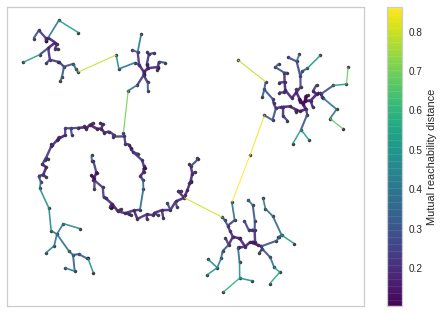

In [216]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit(hdb_data)
hdbscan_model.minimum_spanning_tree_.plot(edge_alpha=0.9, edge_cmap="viridis", node_size=10, edge_linewidth=1)

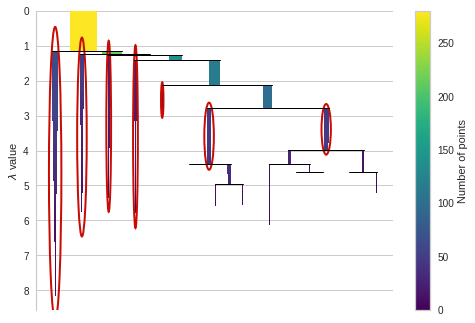

In [217]:
hdbscan_model.condensed_tree_.plot(select_clusters=True)

In [218]:
# HDBSCAN - K-means 성능 비교

hdb_data_km = KMeans(n_clusters=7).fit(hdb_data)
hdb_data_km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [219]:
hdb_data_hdbscan_label = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit_predict(hdb_data)
hdb_data_hdbscan_label[:10]

array([5, 5, 6, 5, 6, 5, 6, 5, 5, 5])

In [222]:
hdb_data_df["kmeans_label"] = hdb_data_km.labels_
hdb_data_df["kmeans_label"] = hdb_data_df["kmeans_label"].astype(str)

hdb_data_df["hdbscan_label"] = hdb_data_hdbscan_label
hdb_data_df["hdbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

for label_case in ["hdbscan_label", "kmeans_label"]:
  fig = px.scatter(hdb_data_df, x="x", y="y", color=label_case)
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()

In [225]:
hdb_data_dbscan = DBSCAN(eps=0.3, min_samples=5).fit(hdb_data)
hdb_data_df["dbscan_label"] = hdb_data_dbscan
hdb_data_df["dbscan_label"] = hdb_data_df["hdbscan_label"].astype(str)

for label_case in ["hdbscan_label", "dbscan_label"]:
  fig = px.scatter(hdb_data_df, x="x", y="y", color=label_case)
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()

In [228]:
blobs1, _ = make_blobs(n_samples=200, centers=[(-10, 5), (0, -5)], cluster_std=0.5)
blobs2, _ = make_blobs(n_samples=200, centers=[(30, -1), (30, 1.5)], cluster_std=5.0)

comp_data = np.vstack([blobs1, blobs2])
comp_data_df = pd.DataFrame(comp_data, columns=["x","y"])
comp_data_df.head()

,x,y
0,-0.348695,-5.424158
1,-9.519343,4.528887
2,-0.077306,-4.433073
3,-0.020637,-5.148443
4,-10.158782,5.239129


In [229]:
fig = px.scatter(comp_data_df, x="x", y="y")
fig.update_layout(width=600, height=500, title="데이터 분포")
fig.show()

In [231]:
# 각 모델의 label을 dataframe로 저장, string으로 변환

# dbscan 훈련
dbscan_model = DBSCAN(eps=0.6, min_samples=10).fit(comp_data)
comp_data_df["dbscan_label"] = dbscan_model.labels_
comp_data_df["dbscan_label"] = comp_data_df["dbscan_label"].astype(str)

# hdbscan 훈련
hdbscan_labels = hdbscan.HDBSCAN(min_cluster_size=5, min_samples=None, cluster_selection_epsilon=0.1, gen_min_span_tree=True).fit_predict(comp_data)
comp_data_df["hdbscan_label"] = hdbscan_labels
comp_data_df["hdbscan_label"] = comp_data_df["hdbscan_label"].astype(str)

In [232]:
comp_data_df.head()

,x,y,dbscan_label,hdbscan_label
0,-0.348695,-5.424158,0,1
1,-9.519343,4.528887,1,2
2,-0.077306,-4.433073,0,1
3,-0.020637,-5.148443,0,1
4,-10.158782,5.239129,1,2


In [233]:
color_dict = {"-1":"#d8d8d8", "0":"#ff5e5b", "1":"#457b9d", "2":"#00cecb", "3":"#FFED66"}
comp_data_df["dbscan_label_color"] = comp_data_df["dbscan_label"].map(color_dict)
comp_data_df["hdbscan_label_color"] = comp_data_df["hdbscan_label"].map(color_dict)

for label_case in ["hdbscan_label_color", "dbscan_label_color"]:
  fig = go.Figure(data=go.Scatter(
      x=comp_data_df["x"],
      y=comp_data_df["y"],
      mode="markers",
      marker=dict(color=comp_data_df[label_case], showscale=True)
  ))
  fig.update_layout(width=600, height=500, title=f"{label_case} 시각화")
  fig.show()